<a href="https://colab.research.google.com/github/43pratik/ML_lab/blob/main/Prac_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/diabetes.csv')

In [4]:
#Preprocessing
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42) # Replace 'base_estimator' with 'estimator'
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
print("\nBagging Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Classification Report:\n", classification_report(y_test, y_pred_bagging))


Bagging Results:
Accuracy: 0.7402597402597403
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



In [10]:
# Boosting - Using AdaBoost
boosting_model = AdaBoostClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)
print("\nBoosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_boosting))
print("Classification Report:\n", classification_report(y_test, y_pred_boosting))


Boosting Results:
Accuracy: 0.7402597402597403
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



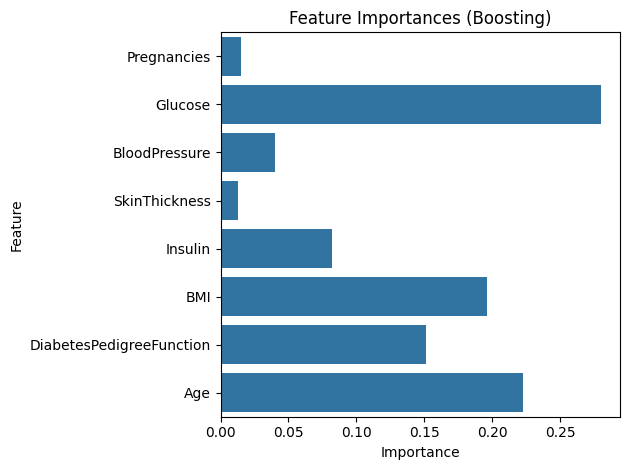

In [11]:
importances = boosting_model.feature_importances_
features = data.columns[:-1]
sns.barplot(x=importances, y=features)
plt.title("Feature Importances (Boosting)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()